In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('C:/Users/timex/Documents/data scienece 2024/ml project/notebook/Data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math score'],axis=1)

In [5]:
y=df['math score']

In [6]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

In [7]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [8]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [9]:
from sklearn.preprocessing  import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(handle_unknown='ignore',drop='first')
preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",numeric_transformer,num_features),
        ("StandardScaler()",oh_transformer,cat_features)
    ]
)

In [11]:
X=preprocessor.fit_transform(X)

In [12]:
X

array([[ 0.19399858,  0.39149181,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.42747598,  1.31326868,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60515772,  0.58901542,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape

((670, 14), (330, 14))

In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [15]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "support vector":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "xgboost":XGBRegressor(),
    "catboost":CatBoostRegressor()
    
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_square=evaluate_model(y_train,y_train_pred)
    y_test_pred=model.predict(X_test)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_square=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print("- mean absolute error : {:4f}".format( model_train_mae))
    print("- mean squared error: {:4f}".format(model_train_mse))
    print("- root mean squared error : {:4f}".format(model_train_rmse))
    print("- r2_square: {:4f}".format(model_train_r2_square))

    print('---------------------------------')

    print('model performance for test set')
    print("- mean absolute error : {:4f}".format( model_test_mae))
    print("- mean squared error: {:4f}".format(model_test_mse))
    print("- root mean squared error : {:4f}".format(model_test_rmse))
    print("- r2_square: {:4f}".format(model_test_r2_square))
    r2_list.append(model_test_r2_square)
    


    print('------------------------------------------------------------')

    
    

    

LinearRegression
model performance for training set
- mean absolute error : 4.207651
- mean squared error: 27.764136
- root mean squared error : 5.269168
- r2_square: 0.875179
---------------------------------
model performance for test set
- mean absolute error : 4.370315
- mean squared error: 30.213818
- root mean squared error : 5.496710
- r2_square: 0.875531
------------------------------------------------------------
Ridge
model performance for training set
- mean absolute error : 4.207568
- mean squared error: 27.770549
- root mean squared error : 5.269777
- r2_square: 0.875150
---------------------------------
model performance for test set
- mean absolute error : 4.368735
- mean squared error: 30.234152
- root mean squared error : 5.498559
- r2_square: 0.875447
------------------------------------------------------------
Lasso
model performance for training set
- mean absolute error : 5.180059
- mean squared error: 42.762854
- root mean squared error : 6.539331
- r2_square: 0.8

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name','R2score']).sort_values(by=['R2score'],ascending=False)

,model_name,R2score
0,LinearRegression,0.875531
1,Ridge,0.875447
8,GradientBoostingRegressor,0.865870
10,catboost,0.854852
4,RandomForestRegressor,0.847373
7,AdaBoostRegressor,0.840757
9,xgboost,0.820411
2,Lasso,0.809188
3,KNeighborsRegressor,0.780470
5,support vector,0.714485


In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.55


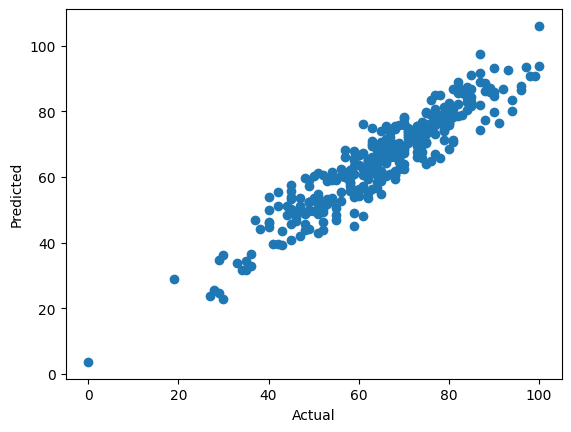

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

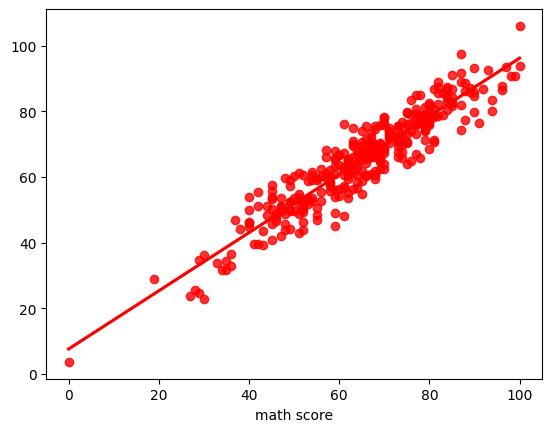

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [20]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
506    68
342    69
485    70
711    80
133    75
Name: math score, Length: 330, dtype: int64

In [21]:
pred_df=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'error':abs(y_test-y_pred)})

In [22]:
pred_df

,actual_value,predicted_value,error
521,91,76.443742,14.556258
737,53,58.827765,5.827765
740,80,76.885528,3.114472
660,74,76.890291,2.890291
411,84,87.577625,3.577625
...,...,...,...
506,68,74.555614,6.555614
342,69,65.460049,3.539951
485,70,78.232278,8.232278
711,80,79.987862,0.012138
